## Question 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def ten_armed_testbed(eps):
    # Initialize
    arms = 10
    epsilon = eps
    timestamps = 1000
    episodes = 2000
    rewards = [0 for i in range(0,timestamps)]
    optimal_arm = [0 for i in range(0,timestamps)]
    abs_error = [0 for i in range(0,timestamps)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = np.random.normal(0,1,10)

        #Step 2 : simulate 10-arm bandit for 1000 timestamps
        Qt = [0.0 for i in range(0,arms)]
        Nt = [0 for i in range(0,arms)]

        for iteration in range (0,timestamps):
            # arm chosen in timestamp t is At
            # corresponding reward is Rt
            # optimal arm is true_At 
            
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)

            # Step 1 : Choose arm
            if np.random.uniform(0,1) < epsilon :
                # choose random arm
                At = np.random.randint(0,arms,dtype=int)
            else:
                # choose greedy arm
                At = np.argmax(Qt)

            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],4)

            # Step 3 : Update Qt, Nt, rewards, absolute error and optimal_arm
            Nt[At] += 1
            Qt[At] += (Rt-Qt[At])/Nt[At]
            rewards[iteration] += Rt
            if At == true_At:
                optimal_arm[iteration] += 1
            else:
                true_rew = np.random.normal(true_At,1)
                abs_error[iteration] += abs(Rt-true_rew)

    for iteration in range(0, timestamps):
        rewards[iteration] /= episodes
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
        abs_error[iteration] /= episodes
    
    return rewards,optimal_arm, abs_error

In [8]:
def ten_armed_testbed_variable_epsilon():
    # Initialize
    arms = 10
    timestamps = 1000
    episodes = 2000
    rewards = [0 for i in range(0,timestamps)]
    optimal_arm = [0 for i in range(0,timestamps)]
    abs_error = [0 for i in range(0,timestamps)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = np.random.normal(0,1,10)

        #Step 2 : simulate 10-arm bandit for 1000 timestamps
        Qt = [0.0 for i in range(0,arms)]
        Nt = [0 for i in range(0,arms)]

        for iteration in range (0,timestamps):
            # arm chosen in timestamp t is At
            # corresponding reward is Rt
            # optimal arm is true_At 
            # epsilon changes as 1/0.1*(iteration+1)
            
            epsilon = 1/(0.1*(iteration+1))
            
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)

            # Step 1 : Choose arm
            if np.random.uniform(0,1) < epsilon :
                # choose random arm
                At = np.random.randint(0,arms,dtype=int)
            else:
                # choose greedy arm
                At = np.argmax(Qt)

            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],4)

            # Step 3 : Update Qt, Nt, rewards, abs_error and optimal_arm
            Nt[At] += 1
            Qt[At] += (Rt-Qt[At])/Nt[At]
            rewards[iteration] += Rt
            if At == true_At:
                optimal_arm[iteration] += 1
            else:
                true_rew = np.random.normal(true_At,1)
                abs_error[iteration] += abs(Rt-true_rew)

    for iteration in range(0, timestamps):
        rewards[iteration] /= episodes
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
        abs_error[iteration] /= episodes
    
    return rewards,optimal_arm,abs_error

### Plots of Average Rewards, % Optimal Action, Average absolute error in action estimate for ∈ = 0, 0.01, 0.1

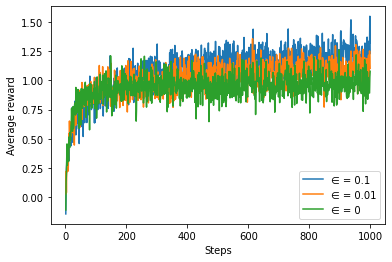

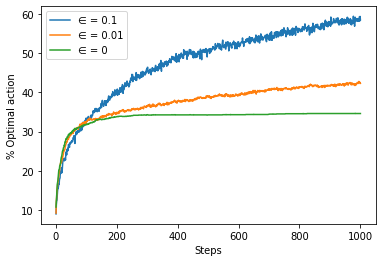

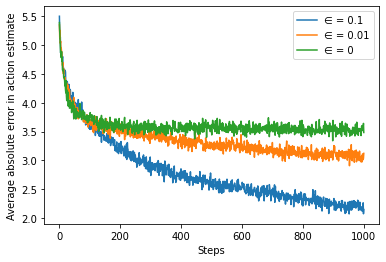

In [9]:
timestamps = 1000
time = [i for i in range(1,timestamps+1)]

rewards1,optimal_arm1,abs_error1 = ten_armed_testbed(0)
rewards2,optimal_arm2,abs_error2 = ten_armed_testbed(0.01)
rewards3,optimal_arm3,abs_error3 = ten_armed_testbed(0.1)

# plotting figure 1 - Average rewards
plt.figure()
plt.plot(time, rewards3, label='∈ = 0.1')
plt.plot(time, rewards2, label='∈ = 0.01')
plt.plot(time, rewards1, label='∈ = 0')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

#plotting figure 2 - % Optimal action
plt.figure()
plt.plot(time, optimal_arm3, label='∈ = 0.1')
plt.plot(time, optimal_arm2, label='∈ = 0.01')
plt.plot(time, optimal_arm1, label='∈ = 0')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.show()

#plotting figure 3 - Average absolute error in action estimate
plt.figure()
plt.plot(time, abs_error3, label='∈ = 0.1')
plt.plot(time, abs_error2, label='∈ = 0.01')
plt.plot(time, abs_error1, label='∈ = 0')
plt.xlabel('Steps')
plt.ylabel('Average absolute error in action estimate')
plt.legend()
plt.show()

### Plots of Average Rewards, % Optimal Action, Average absolute error in action estimate for ∈ that changes with time ( ∈(t) = 1/t , t ≥ 1)

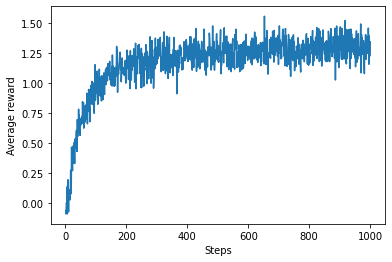

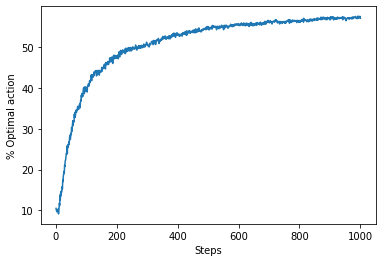

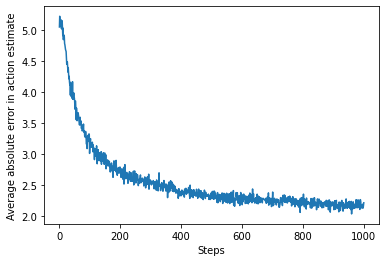

In [10]:
timestamps = 1000
time = [i for i in range(1,timestamps+1)]

rewards,optimal_arm,abs_error = ten_armed_testbed_variable_epsilon()

# plotting figure 1 - Average rewards
plt.figure()
plt.plot(time, rewards)
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.show()

#plotting figure 2 - % Optimal action
plt.figure()
plt.plot(time, optimal_arm)
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.show()

#plotting figure 3 - Average absolute error in action estimate
plt.figure()
plt.plot(time, abs_error)
plt.xlabel('Steps')
plt.ylabel('Average absolute error in action estimate')
plt.show()